# 12. Machine learning techniques

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/ML_in_practice

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/machine_learning_1/ML_in_practice


In [ ]:
import random as rd
rd.seed(0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [ ]:
# use pabdas to read './titanic.csv'
raw_data = pd.read_excel('/content/titanic (2).xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Next, we can explore the dataset.

In [ ]:
# Use pandas to examine some info of the dataset

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'body'}>, <Axes: >, <Axes: >]],
      dtype=object)

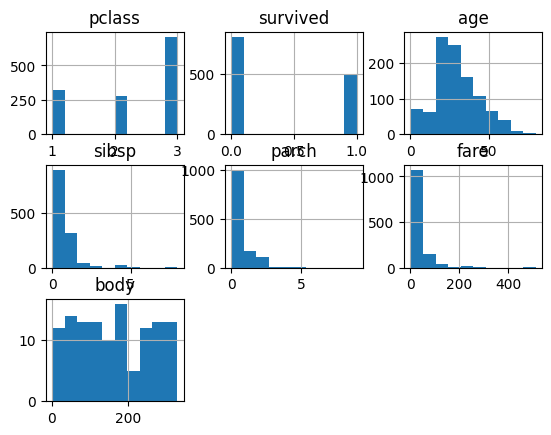

In [ ]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist()

In [ ]:
# Use pandas to examine "survived" column (labels)
raw_data['survived']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [ ]:
# Use pandas to exanine more than one column at the same time ["Name", "Age"]
raw_data[["name", "age"]]


,name,age
0,"Allen, Miss. Elisabeth Walton",29.0000
1,"Allison, Master. Hudson Trevor",0.9167
2,"Allison, Miss. Helen Loraine",2.0000
3,"Allison, Mr. Hudson Joshua Creighton",30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000
...,...,...
1304,"Zabour, Miss. Hileni",14.5000
1305,"Zabour, Miss. Thamine",NaN
1306,"Zakarian, Mr. Mapriededer",26.5000
1307,"Zakarian, Mr. Ortin",27.0000


In [ ]:
# Use pandas to check how many passengers survived
raw_data["survived"].sum()


500

In [ ]:
raw_data["survived"].value_counts() #show balanc

0    809
1    500
Name: survived, dtype: int64

In [ ]:
skew = raw_data.skew()
skew

<ipython-input-9-d338edf7fd0e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = raw_data.skew()


pclass     -0.598647
survived    0.486404
age         0.407672
sibsp       3.844220
parch       3.669078
fare        4.367709
body        0.091739
dtype: float64

[39.02439024 60.83916084 63.08139535 57.75862069 61.48148148 54.28571429
 68.75       75.        ]


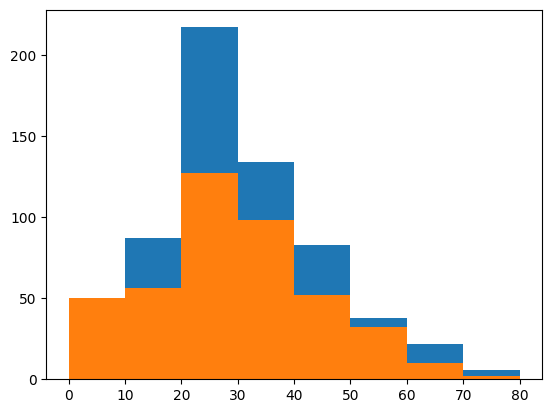

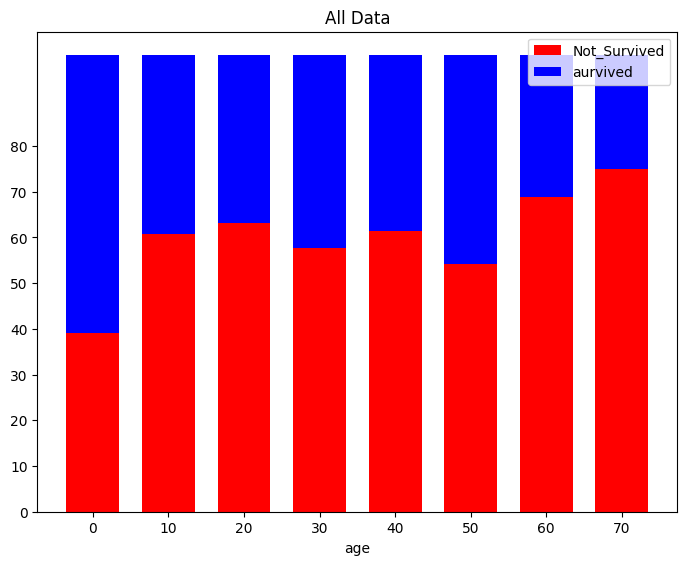

[35.8974359  26.5625     28.69565217 20.93023256 21.73913043  7.40740741
 20.          0.        ]


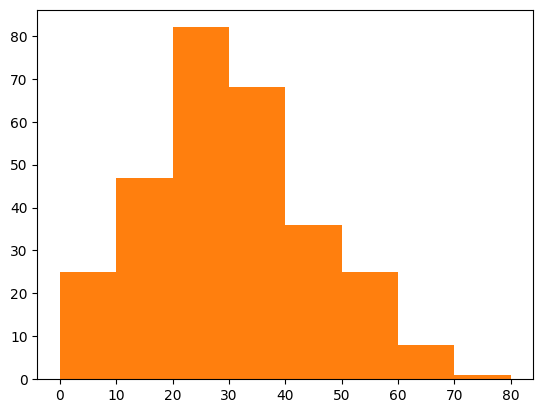

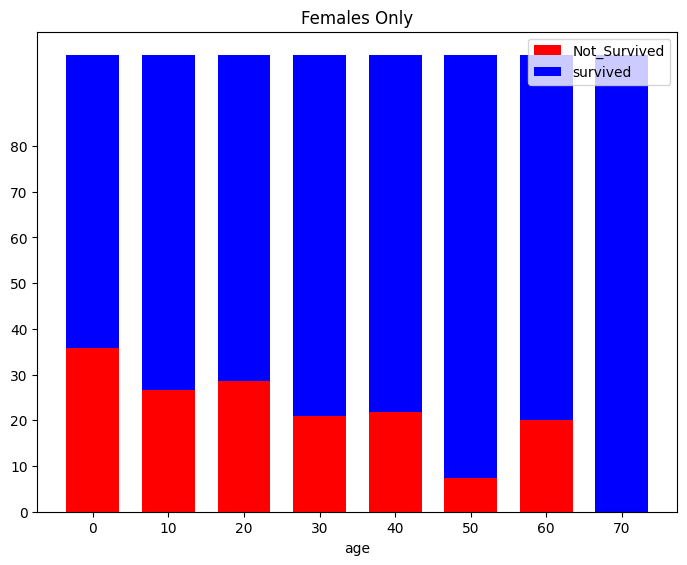

[41.86046512 88.60759494 80.34934498 79.45205479 82.02247191 83.72093023
 90.90909091 85.71428571]


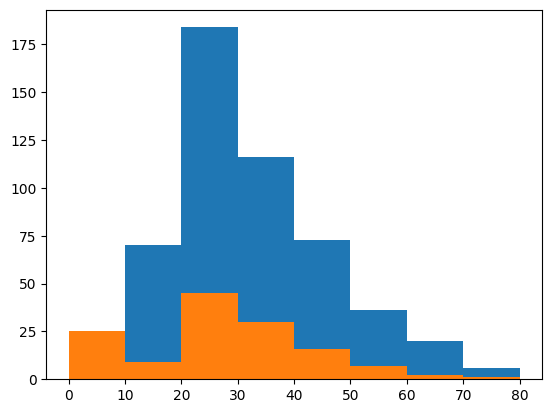

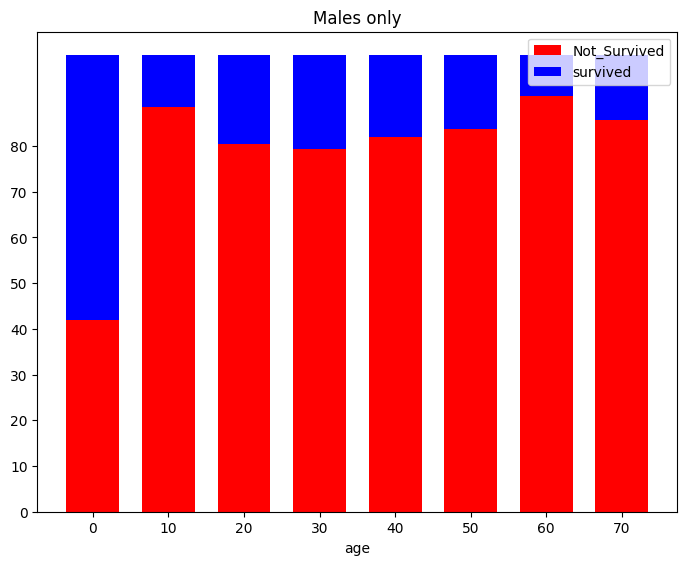

In [ ]:
# visulaization
a=raw_data.where(raw_data["survived"]==0)[["age","survived"]]
b=raw_data.where(raw_data["survived"]==1)[["age","survived"]]
v1,b1,_=plt.hist(a["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'aurvived'])
plt.show()


a=raw_data.loc[(raw_data["survived"]==0) & (raw_data["sex"]=="female"),["age","survived"]]
b=raw_data.loc[(raw_data["survived"]==1) & (raw_data["sex"]=="female"),["age","survived"]]
v1,b1,_=plt.hist(a["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'survived'])
plt.show()

a=raw_data.loc[(raw_data["survived"]==0) & (raw_data["sex"]=="male"),["age","survived"]]
b=raw_data.loc[(raw_data["survived"]==1) & (raw_data["sex"]=="male"),["age","survived"]]
v1,b1,_=plt.hist(a["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'survived'])
plt.show()

## 12.2. Cleaning up the data

Now, let's look at how many columns have missing data

In [ ]:
# use pandas to check missing data (NA(not available) values) for all the columns
miss_val=raw_data.isnull().sum()
print(miss_val[miss_val>0])


age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [ ]:
# Use pandas to drop "Cabin" column
clean_data = raw_data.drop(['cabin','body','home.dest','boat'],axis=1)

In [ ]:
clean_data

<ipython-input-15-6c4c94dff532>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data['age'])


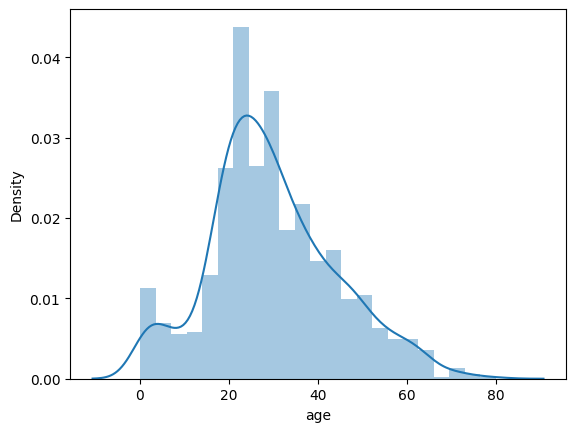

In [ ]:
sns.distplot(clean_data['age'])
plt.show()

Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [ ]:
# get the median of age column using pandas
median_age = clean_data['age'].median()
median_age

28.0

In [ ]:
# use pandas to fill the na values in age column with the median age
clean_data["age"] = clean_data["age"].fillna(median_age)
missing_val=clean_data.isnull().sum()
print(missing_val[missing_val>0])

fare        1
embarked    2
dtype: int64


In [ ]:
# use pandas to fill the na values in embarked column with 'U'

#clean_data["Embarked"] =
#clean_data["embarked"] = clean_data["embarked"].fillna('U')

In [ ]:
clean_data.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64

In [ ]:
# view 10 rows of the clean dataset

clean_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C


<ipython-input-21-36c279755f3e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_data.corr(), annot=True, fmt='.2f', square=True, cmap = 'Greens')


<Axes: title={'center': 'Titanic Survival - Correlation-OVERALL'}>

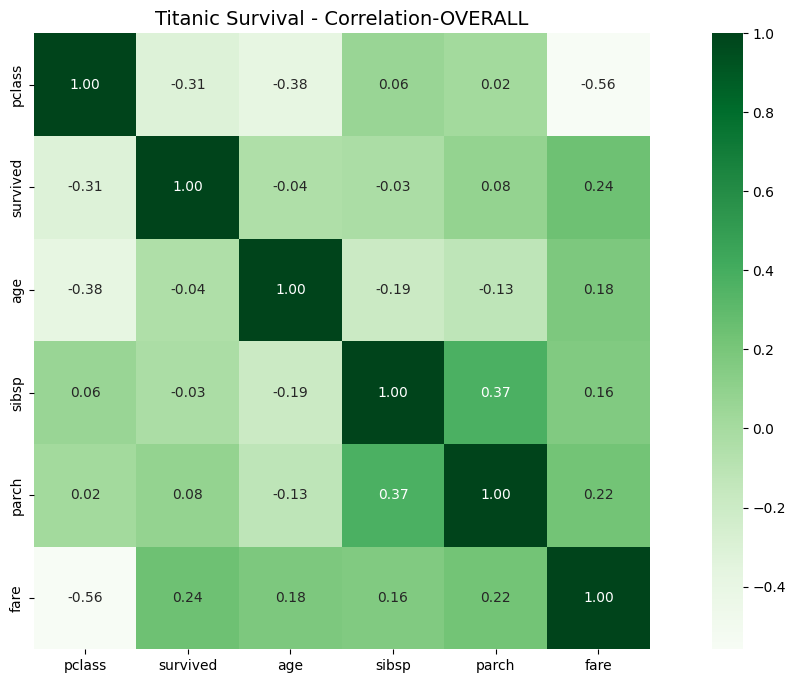

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.title('Titanic Survival - Correlation-OVERALL', fontsize=14)
sns.heatmap(clean_data.corr(), annot=True, fmt='.2f', square=True, cmap = 'Greens')

### 12.2.3 Saving our data for the future

In [ ]:
# save the clean dataset to './clean_titanic_data.csv'
clean_data.to_csv("preprocessed_data.csv",index_label=False)

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [ ]:
preprocessed_data = pd.read_csv('preprocessed_data.csv')
preprocessed_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [ ]:

preprocessed_data['embarked'].unique()

array(['S', 'C', 'U', 'Q'], dtype=object)

In [ ]:
# Use pandas method .get_dummies() to get the one hot encoding of “embarked”, “pclass” and “gender”
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(preprocessed_data[["embarked", "sex" , "pclass"]]).toarray()
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
df=preprocessed_data.drop(["embarked", "sex" , "pclass"],axis=1)
df1=pd.concat([df,encoded_data],axis=1)
df1

# Use pandas method .drop() to remove the old columns and method .concat() to add the new columns





,survived,name,age,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S,embarked_U,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1305,0,"Zabour, Miss. Thamine",28.0000,1,0,2665,14.4542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1306,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 12.3.2 Binning

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Use .cut() method to make bins from the age column

categorized_age =pd.cut(df1['age'],bins)
df1['categorized_age']=categorized_age
preprocessed_data = df1.drop(['age'], axis=1)
preprocessed_data

,survived,name,sibsp,parch,ticket,fare,embarked_C,embarked_Q,embarked_S,embarked_U,sex_female,sex_male,pclass_1,pclass_2,pclass_3,categorized_age
0,1,"Allen, Miss. Elisabeth Walton",0,0,24160,211.3375,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(20, 30]"
1,1,"Allison, Master. Hudson Trevor",1,2,113781,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,"(0, 10]"
2,0,"Allison, Miss. Helen Loraine",1,2,113781,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(0, 10]"
3,0,"Allison, Mr. Hudson Joshua Creighton",1,2,113781,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,"(20, 30]"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,2,113781,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",1,0,2665,14.4542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(10, 20]"
1305,0,"Zabour, Miss. Thamine",1,0,2665,14.4542,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"(20, 30]"
1306,0,"Zakarian, Mr. Mapriededer",0,0,2656,7.2250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"
1307,0,"Zakarian, Mr. Ortin",0,0,2670,7.2250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"(20, 30]"


In [ ]:
# Use pandas method .get_dummies() to get the one hot encoding of “Categorized_age”
# Use pandas method .drop() to remove the old column and method .concat() to add the new columns

df1=pd.get_dummies(preprocessed_data['categorized_age'],dtype=int)
preprocessed_data=preprocessed_data.drop(['categorized_age'],axis=1)
prosessed_data=pd.concat([df1,preprocessed_data],axis=1)
prosessed_data.columns


Index([     (0, 10],     (10, 20],     (20, 30],     (30, 40],     (40, 50],
           (50, 60],     (60, 70],     (70, 80],   'survived',       'name',
            'sibsp',      'parch',     'ticket',       'fare', 'embarked_C',
       'embarked_Q', 'embarked_S', 'embarked_U', 'sex_female',   'sex_male',
         'pclass_1',   'pclass_2',   'pclass_3'],
      dtype='object')

### 12.3.4 Feature selection

In [ ]:
# drop these columns['Name', 'Ticket', 'PassengerId']

clean_data=prosessed_data.drop(['name','ticket'],axis=1)
clean_data['fare']=clean_data['fare'].fillna(0)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (0, 10]     1309 non-null   int64  
 1   (10, 20]    1309 non-null   int64  
 2   (20, 30]    1309 non-null   int64  
 3   (30, 40]    1309 non-null   int64  
 4   (40, 50]    1309 non-null   int64  
 5   (50, 60]    1309 non-null   int64  
 6   (60, 70]    1309 non-null   int64  
 7   (70, 80]    1309 non-null   int64  
 8   survived    1309 non-null   int64  
 9   sibsp       1309 non-null   int64  
 10  parch       1309 non-null   int64  
 11  fare        1309 non-null   float64
 12  embarked_C  1309 non-null   float64
 13  embarked_Q  1309 non-null   float64
 14  embarked_S  1309 non-null   float64
 15  embarked_U  1309 non-null   float64
 16  sex_female  1309 non-null   float64
 17  sex_male    1309 non-null   float64
 18  pclass_1    1309 non-null   float64
 19  pclass_2    1309 non-null  

### 12.3.5 Saving for future use

In [ ]:
clean_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [ ]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()

,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]",survived,sibsp,...,fare,embarked_C,embarked_Q,embarked_S,embarked_U,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,1,0,0,0,0,0,1,0,...,211.3375,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,0,0,0,0,0,0,0,1,1,...,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,1,...,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,1,0,0,0,0,0,0,1,...,151.5500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,1,...,151.5500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### 12.4.1 Features-labels split and train-validation split

In [ ]:
# drop ["Survived"] column and save that to features
features = data.drop(["survived"],axis=1)

# save the ["Survived"] column to labels
labels = data["survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test =train_test_split(features,labels,test_size=0.4,random_state=100)

In [ ]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test =train_test_split(features_validation_test,  labels_validation_test, test_size=0.5, random_state=100)

In [ ]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

785
262
262
785
262
262


### 12.4.2 Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [ ]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train,labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train,labels_train)

DecisionTreeClassifier()

In [ ]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(features_train,labels_train)

SVC()

In [ ]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(features_train,labels_train)

RandomForestClassifier()

In [ ]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train,labels_train)

GradientBoostingClassifier()

In [ ]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(features_train,labels_train)

AdaBoostClassifier()

### 12.4.3 Evaluating the models

#### Accuracy

In [ ]:
# print accuracy of each model on validation data
print("Scores of the models",)
print("Logistic regression:",lr_model.score(features_validation,labels_validation) )
print("Decision tree:",dt_model.score(features_validation,labels_validation) )
print("SVM:", svm_model.score(features_validation,labels_validation))
print("Random forest:",rf_model.score(features_validation,labels_validation))
print("Gradient boosting:",gb_model.score(features_validation,labels_validation) )
print("AdaBoost:",ab_model.score(features_validation,labels_validation) )

Scores of the models
Logistic regression: 0.7557251908396947
Decision tree: 0.7595419847328244
SVM: 0.6908396946564885
Random forest: 0.7709923664122137
Gradient boosting: 0.7900763358778626
AdaBoost: 0.767175572519084


In [ ]:
lr_pred=lr_model.predict(features_validation)
dt_pred=dt_model.predict(features_validation)
svm_pred=svm_model.predict(features_validation)
rf_pred=rf_model.predict(features_validation)
gb_pred=gb_model.predict(features_validation)
ab_pred=ab_model.predict(features_validation)

#### F1-score

In [ ]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score

print("F1-scores of the models:")
print("Logistic regression:",f1_score(lr_pred,labels_validation))
print("Decision tree:",f1_score(dt_pred,labels_validation) )
print("SVM:", f1_score(svm_pred,labels_validation))
print("Random forest:",f1_score(rf_pred,labels_validation))
print("Gradient boosting:",f1_score(gb_pred,labels_validation) )
print("AdaBoost:",f1_score(ab_pred,labels_validation) )


F1-scores of the models:
Logistic regression: 0.6701030927835051
Decision tree: 0.6896551724137931
SVM: 0.4705882352941177
Random forest: 0.7029702970297029
Gradient boosting: 0.708994708994709
AdaBoost: 0.6934673366834172


### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [ ]:
# print accuracy of gradient boost model on testing data
print("Gradient boosting:",gb_model.score(features_test,labels_test) )


Gradient boosting: 0.816793893129771


In [ ]:
# print F1-score of gradient boost model on testing data
gb_pred=gb_model.predict(features_test)
print("Gradient boosting:",f1_score(gb_pred,labels_test) )

Gradient boosting: 0.7333333333333334


# 12.5 Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
# use gridsearch to find the best hyperparameters
svm = SVC()
svm_gs = GridSearchCV(estimator=svm,param_grid=svm_parameters,scoring='accuracy',cv=10,n_jobs=-1)

# git the best model
svm_winner = svm_gs.fit(features_train,labels_train)
svm_winner

svm_winner.score(features_validation, labels_validation)


0.732824427480916

In [ ]:
svm_winner.best_score_

0.7886887374229146

In [ ]:
svm_winner.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

# 12.6 Cross validation

In [ ]:
# print the k-fold ؤ  output
svm_gs.cv_results_

{'mean_fit_time': array([0.06293802, 0.05608315, 0.0612179 , 0.05769522, 0.07463408,
        0.06642172, 0.07400651, 0.05279582, 0.04593172, 0.04253926,
        0.03776319, 0.03895602, 0.04295013, 0.04436569, 0.0450016 ,
        0.04911113, 0.04878736, 0.06136966, 0.04942422, 0.04965744,
        0.10846207, 0.11183105, 0.07376461, 0.06547623, 0.07846432]),
 'std_fit_time': array([0.01479844, 0.01543447, 0.0157909 , 0.01854384, 0.02086045,
        0.01611695, 0.01347948, 0.01648163, 0.0104284 , 0.00123046,
        0.00369419, 0.00123232, 0.00131611, 0.00094112, 0.00241819,
        0.00518627, 0.00284921, 0.00517687, 0.00186954, 0.00217895,
        0.02422998, 0.0210216 , 0.0109541 , 0.02100376, 0.02192518]),
 'mean_score_time': array([0.01829045, 0.01394255, 0.01417522, 0.01280913, 0.01534393,
        0.01575947, 0.0175082 , 0.01262813, 0.00971715, 0.0094759 ,
        0.00928111, 0.00825789, 0.00935345, 0.00992465, 0.0110594 ,
        0.00704188, 0.00756235, 0.00922043, 0.00927269, 0.00

# 12.7 Save the model

In [ ]:
# use joblib to save the model
import joblib
joblib.dump(gb_model, '_model.joblib')

['_model.joblib']